NOTAS LUCAS BALI:
teniendo un conjunto de datos elijo un porcentaje para training y otro para testing (EJ:80 training y 20 testing)
esta separacion es mejorsi es bien aleatorio, para salavarme si habia algun tipo de ordenamiento previo.
los polinomios a elegir los propone el programador, no existe teorema para elegirlo

ejemplos: Y=a  ; Y=a+bx ; Y=a+bx+bax^2 ; etc.

Pruebo sobre el training y de ahi saco los parametros.
Luego lo pruebo sobre el testing y de ahi eligo el mejor modelo para este caso
Luego de ahi vienen varias corrientes:
1. volver a adaptar el modelo elegido pero con el 100 porciento de los datos, es decir volver a generar los parametros
2. quedarse con los parametros ya obtenidos
3. cross validation, (mas adelante lo explicamos)

In [93]:
import numpy.random as rdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [94]:
x=rdm.rand(100)*10 #rand(100) me da 100 valores aleatorios entre 0 y 1
#luego los multiplico por 10 para tener valores aleatorios entre 0, y 10
y=0.5+3*x+rdm.randn(100)*3 #hago una recta perfecta de pendinte 3 y ordenada 0,5 pero le agrego un ruido con randn
print(y)

[ 1.85464266e+01  1.07833495e+00  1.69770823e+01  1.64519517e+01
  1.06277443e+01  2.28893594e+01  2.40472364e+01  1.72407447e+01
  2.15283317e+01  1.32201862e+01  2.27158222e+01  1.89551098e+01
  7.06878817e+00  3.97936094e+00  1.22918418e+01  1.80102507e+01
  2.47458964e+01  1.82174012e+01  9.24251254e+00  2.48473571e+01
  2.18922531e+01  2.01163344e+01  6.97055874e-01  1.26312611e+01
  1.54888127e+01  1.21055123e+01  9.45794357e+00  8.16180500e+00
 -3.15274254e-01  1.73377658e+01  2.91981836e+01  2.97728899e+01
  3.38558941e+01 -5.98928321e-01  1.30272438e+01  3.35938061e+00
  1.05663086e+01  1.61072022e+01  2.64943570e+01  2.80218680e+01
  1.43451231e+01  1.94864595e+01  1.07445777e-02  1.67349883e+01
  2.16312971e+01  2.73824629e+01  2.43188902e+01  1.86673765e+01
  3.37114707e+01  1.37329535e+01  2.92577688e+00  2.26731148e+01
  3.06363942e+00  2.25214677e+01  7.46342841e+00  1.27728901e+01
  9.97217102e+00  2.70931232e+01  2.35819554e+01  2.46006104e+01
  1.70690717e+01  1.76932

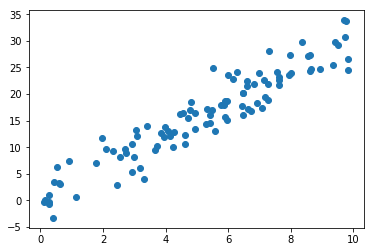

In [95]:
#1)Hacer un scatter plot
plt.scatter(x,y)

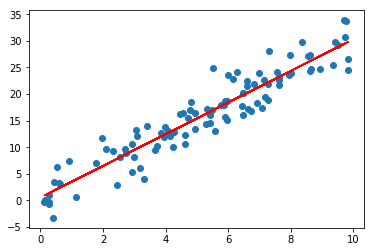

In [103]:
#2)hacer regresion lineal

#con modelo lineal
x2 = x[:, np.newaxis]
r = linear_model.LinearRegression()
r.fit(x2, y)
plt.scatter(x2,y)
plt.plot(x, r.coef_ * x + r.intercept_,color='r')

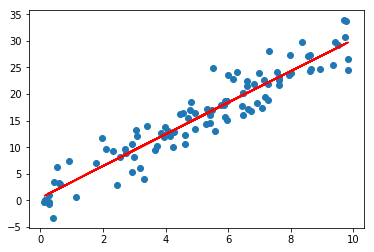

In [120]:
#con modelo cuadratico
matriz=np.array([x,x*x]).T
matriz.shape
r2= linear_model.LinearRegression()
r2.fit(matriz, y)
plt.scatter(x,y)
plt.plot(x, r2.coef_[1] * x * x + r2.coef_[0] * x + r2.intercept_,color='r')

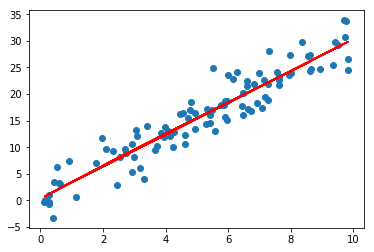

In [124]:
#con modelo cubico
matriz2=np.array([x,x*x,x*x*x]).T
matriz2.shape
r2= linear_model.LinearRegression()
r2.fit(matriz2, y)
plt.scatter(x,y)
plt.plot(x, r2.coef_[2] * x * x *x + r2.coef_[1] * x * x + r2.coef_[0] * x + r2.intercept_,color='r')

In [ ]:
# x es la matriz de datos
# y es el array de datos
n=100 #numero de datos
s=(int)(0.8*n) #numero de muestras que agarro, en este caso va a ser el 80 %
training_index=rdm.choice(range(n),size=s,replace=False) #indice de entrenamiento
#ejemplo rsm.choince(urna con bolitas,cuantas bolitas extraigo, con o sin reposicion (false es sin reposicion))
x_train=x[training_index,:]
y_train=y[training_index]

In [ ]:
test_index=np.setdiff1d(range(n),training_index,False) # me da el complemento de el training index y asi me el test index
x_test=x[test_index,:]
y_test=y[test_index]

Cross validation

teniendo un conjunto de datos, esta vez lo voy a separar en k pedazos. Primero considero 1 como testing y el resto como training
,luego calculo su error y cual es lo que mejor se adapta a ese caso.

esto lo repito rotanto entre todos los k pedasos y considerando siempre el resto como training.

cuando mas k agarre mas exacto (robusto) va a ser el modelo generado pero el programa va a tener complejidad algoritmica mas alta, osea que va a tardar mas

el limite de agarrar k=n siendo n todos los elementos se llama leave one out, y es muy preciso aunque obviamente tarda mas, ya que hace n vueltas

In [133]:
def armar_folds(n,k):
    fold_size=int(n/k)
    folds=[]
    bag=range(n)
    for i in range(k-1):
        fold=rdm.choice(bag,size=fold_size,replace=False)
        bag=np.setdiff1d(bag,fold)
        folds.append(fold)
    folds.append(bag)
    return folds

In [148]:
folds=armar_folds(100,5)
